# Prediksi Pasien Penderita Demam Berdarah Menggunakan Naive Bayes

Nama    : Kavin Nafis Maulana

NIM     : A11.2022.14253

Kelompok: A11.4517




**Ringkasan** 

Demam berdarah merupakan salah satu penyakit yang sering muncul di
Indonesia, terutama di bagian-bagian daerah yang kurang terbangun. Penyakit
ini disebabkan oleh virus dengue yang disebarkan oleh nyamuk-nyamuk
aedes. Penyakit ini bisa menjadi fatal jika tidak ditangani secara maksimal
Sehingga dibuatlah model ini yang dapat membantu prediksi jika seorang
pasien menderita demam berdarah. Dalam modelling ini, data berifat public
yang diperoleh dari Kaggle, dengan entry data sebanyak 5000 data dengan
variable-variabel penting, seperti suhu tubuh, jumlah platelet, jumlah sel darah
putih, rasa sakit, adanya ruam, jenis kelamin, dan status infeksi pasien


**Masalah**

Demam berdarah atau Dengue Haemoragic Fever (DHF) adalah suatu
penyakit yang disebabkan oleh virus dengue, virus ini mudah disbarkan oleh
nyamuk aedes aegypti dan aedes albopictus betina. Pada tahun 2023, ada
88.593 kasus demam berdarah yang Dimana 621 orang diantaranya meninggal
dunia.
Demam berdarah jika tidak ditangani secara maksimal dapat menjadi fatal
karna demam berdarah akan menyebabkan terjadinya kebocoran plasma. Hal
ini mengakibatkan terjadinya perdarahan serius, syok, hingga berujung pada
kematian.

**Tujuan**

Membuat model yang dapat melakukan prediksi terhadap seorang pasien terinfeksi
demam berdarah atau tidak sehingga dapat mendapatkan penanganan yang sesuai
dan cepat.

**Alur**

![Load data -> Preprocessing data -> Split data -> Model training -> Evaluasi -> Deployment](Alur.png)


In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

blok koding diatas digunakan untuk mendefine library-library yang dibutuhkan untuk melakukan prediksi menggunakan naivebayes

# Load Data

Data yang digunakan untuk melatih model dalam prediksi ini adalah data publik yang didapat dari [Kaggle](https://www.kaggle.com/datasets/getanmolgupta01/dengue-classification/data)

Data berisikan 5000 entries dengan fitur-fitur yang memperlihatakn kondisi dari seorang pasien yang berkaitan dengan penyakit demam berdarah.

In [2]:
data = pd.read_csv('data/dengue_dataset.csv')

In [6]:
data.head()

,Temperature,Platelet_Count,White_Blood_Cell_Count,Body_Pain,Rash,Gender,Infected
0,98.249080,138060.514266,6854.650578,0,0,Female,False
1,99.401429,102193.912651,7347.397486,1,0,Female,False
2,98.963988,141755.585100,6011.997182,0,1,Male,False
3,98.697317,168269.474640,6852.807249,1,0,Male,True
4,97.812037,160752.598059,6800.937446,1,0,Female,True


Dataset ini memiliki fitur seperti :

1. Temperature: Suhu tubuh pasien (dalam derajat Fahrenheit).
2. Platelet_Count: Jumlah trombosit dalam darah pasien (dalam satuan sel/μL).
3. White_Blood_Cell_Count: Jumlah sel darah putih dalam darah pasien (dalam satuan sel/μL).
4. Body_Pain: Indikator nyeri tubuh (0 = Tidak, 1 = Ringan, 2 = Berat).
5. Rash: Indikator adanya ruam pada kulit (0 = Tidak, 1 = Ya).
6. Gender: Jenis kelamin pasien (Male/Female/Other).
7. Infected: Target prediksi, apakah pasien terinfeksi dengue (0 = Tidak, 1 = Ya).

# Eksplorasi Data Analysis (EDA)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             5000 non-null   float64
 1   Platelet_Count          5000 non-null   float64
 2   White_Blood_Cell_Count  5000 non-null   float64
 3   Body_Pain               5000 non-null   int64  
 4   Rash                    5000 non-null   int64  
 5   Gender                  5000 non-null   object 
 6   Infected                5000 non-null   bool   
dtypes: bool(1), float64(3), int64(2), object(1)
memory usage: 239.4+ KB


Di dalam dataset ini, data dibagi menjadi 3 tipe yaitu :
1. Numerik: Temperature, Platelet_Count, White_Blood_Cell_Count.
2. Kategorikal: Gender.
3. Biner: Body_Pain, Rash, Infected.

In [9]:
print(data.isnull().sum())

Temperature               0
Platelet_Count            0
White_Blood_Cell_Count    0
Body_Pain                 0
Rash                      0
Gender                    0
Infected                  0
dtype: int64


Pengecekan dari dataset untuk mengecek apakah ada nilai kosong(null) di dalam dataset

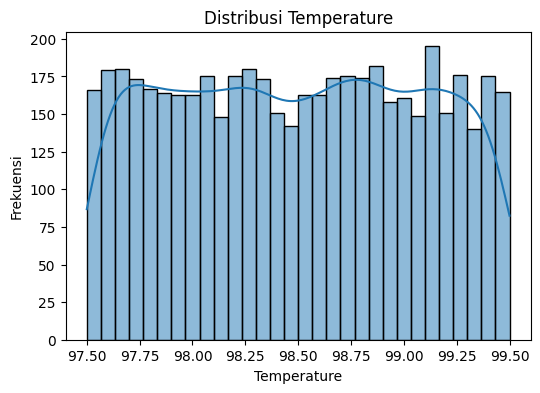

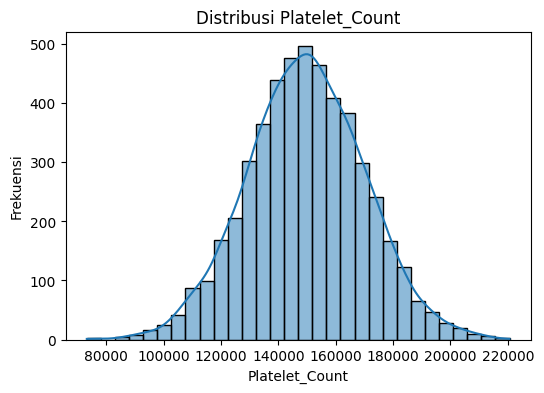

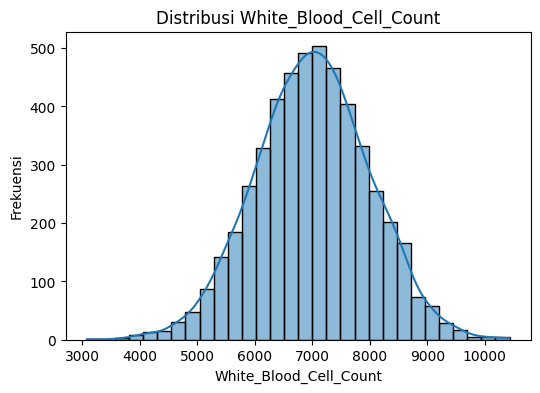

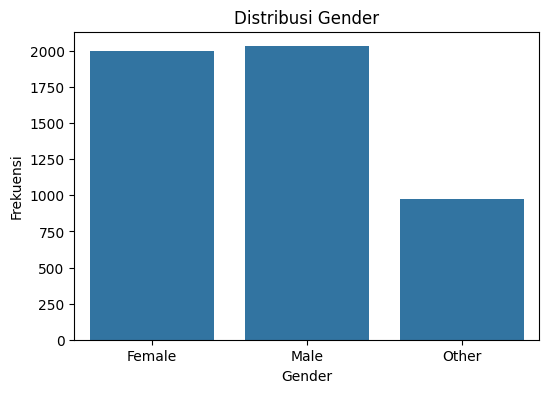

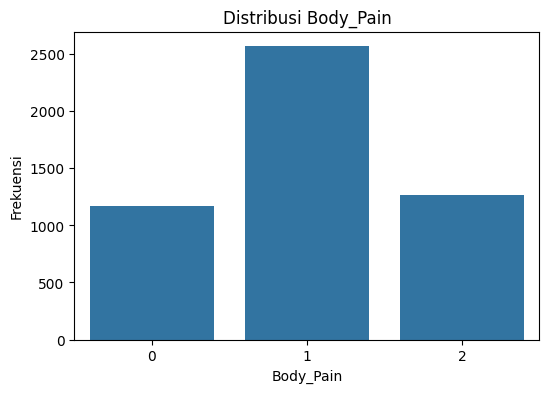

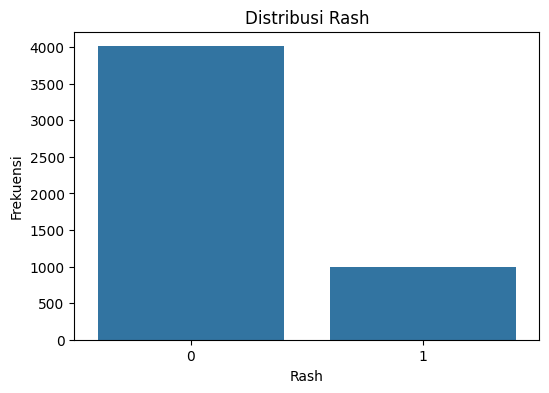

In [ ]:
numerical_features = ['Temperature', 'Platelet_Count', 'White_Blood_Cell_Count']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f"Distribusi {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frekuensi")
    plt.show()

categorical_features = ['Gender', 'Body_Pain', 'Rash']
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=data[feature])
    plt.title(f"Distribusi {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frekuensi")
    plt.show()


Distribusi dari jumlah fitur dalam dataset

# Preprocessing Data